In [2]:
# import libraries
from src.data.rw_utils import read_from_db, write_to_db, load_model
from src.models.pipelines import apply_clustering, apply_svd, apply_tf_idf, apply_svd_pipeline, pipeline
from src.features.feature_engineering import FeatureEngineering
from src.data.plots import plot_bar_chart, plot_wordcloud, plot_pie_chart, plot_dendogram, plot_elbow, plot_cluster_result
import time
import numpy as np
from sklearn import metrics
import pandas as pd

c:\users\user\anaconda3\envs\findcategory\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
# read preprocessed data from source
df = read_from_db("preprocess_completed", "preprocessed.db")
df.head()

Data is read. Len of the data 150306 and columns Index(['index', 'content', 'category'], dtype='object')


,index,content,category
0,1225,winter sitout period end monday transfer stude...,newspaper
1,1226,peopl kill miss ferri caught sunday coast indo...,newspaper
2,1227,hello mark olsen welcom weekli field guid worl...,newspaper
3,1228,carri fisher best known princess leia star war...,newspaper
4,1229,place like home jeff carter king roam free ret...,newspaper


In [14]:
df = df.drop("index", axis=1)
df

,content,category
0,winter sitout period end monday transfer stude...,newspaper
1,peopl kill miss ferri caught sunday coast indo...,newspaper
2,hello mark olsen welcom weekli field guid worl...,newspaper
3,carri fisher best known princess leia star war...,newspaper
4,place like home jeff carter king roam free ret...,newspaper
...,...,...
150301,san francisco airbnb agre monday settl lawsuit...,newspaper
150302,band popular song night drove old dixi exconfe...,newspaper
150303,rev billi graham admit later year learn hard l...,newspaper
150304,sammi stewart set record struck seven batter r...,newspaper


# balanced data

In [24]:
import pandas as pd
# df.category=="radio"& df.category=="wire"& df.category=="business"
_df = df[df.category=="newspaper"].iloc[:6739, :]
_df2 = df[df.category=="general"].iloc[:6739, :]
_df3 = df[df.category=="broadcast"].iloc[:6739, :]
_df4 = df[df.category=="radio"].iloc[:6739, :]
_df5 = df[df.category=="wire"].iloc[:6739, :]
_df6 = df[df.category=="business"].iloc[:6739, :]

df_all = pd.concat([_df, _df2, _df3, _df4,_df5,_df6])
df_all.head()

,content,category
0,winter sitout period end monday transfer stude...,newspaper
1,peopl kill miss ferri caught sunday coast indo...,newspaper
2,hello mark olsen welcom weekli field guid worl...,newspaper
3,carri fisher best known princess leia star war...,newspaper
4,place like home jeff carter king roam free ret...,newspaper


In [27]:
transformed = apply_tf_idf(df_all['content'], max_features=100)
df_svd = apply_svd(transformed, 2)
df_svd.shape

(40434, 2)

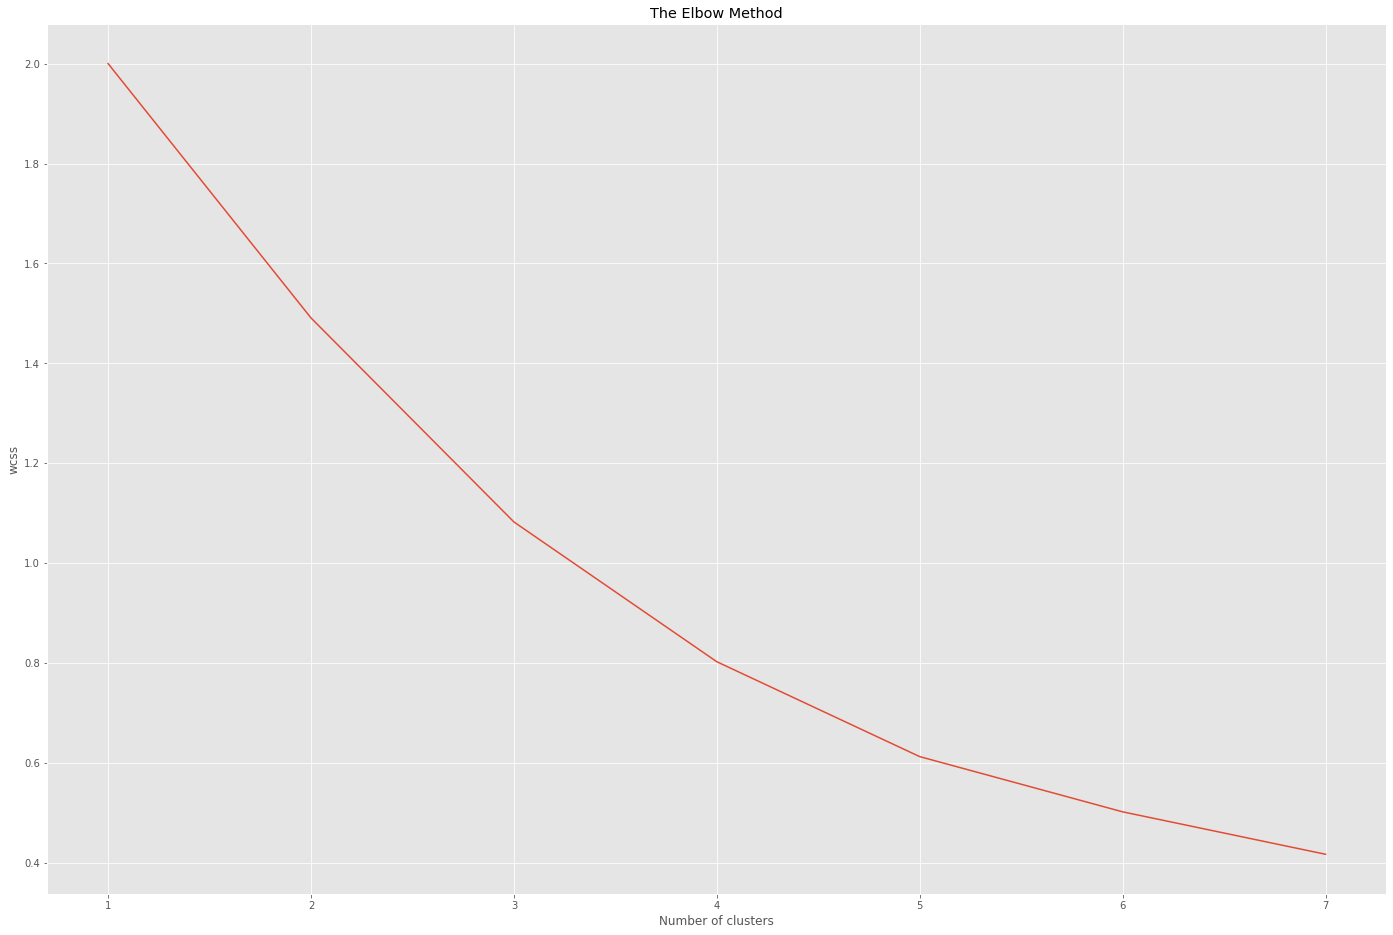

In [28]:
# use elbow method to define number of cluster
plot_elbow(df_svd, (1, 8)).show()

In [30]:
df_all["label"] = df_all["category"].map({'broadcast': 0, 'radio': 1, 'wire': 2, 'business':3, 'general': 4, 'newspaper': 5})
df_all

,content,category,label
0,winter sitout period end monday transfer stude...,newspaper,5
1,peopl kill miss ferri caught sunday coast indo...,newspaper,5
2,hello mark olsen welcom weekli field guid worl...,newspaper,5
3,carri fisher best known princess leia star war...,newspaper,5
4,place like home jeff carter king roam free ret...,newspaper,5
...,...,...,...
58791,socal altright movement descend civil war onn ...,business,3
58792,carri fisher actress known world playingn prin...,business,3
58793,talk wall street prospect deregul follow elect...,business,3
58794,trump tower new york citi evacu tuesday aftern...,business,3


In [44]:
corpus = df_all['content'].values
labels = df_all['label'].values
kmeans, y_kmeans, data_svd = pipeline(corpus, 3,  labels, n_components=2, max_features=1000, n_gram=(1, 2), analyzer="word")

   Completeness  Homogeneity  silhouette_score 
0      0.028979     0.000985           0.979907


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


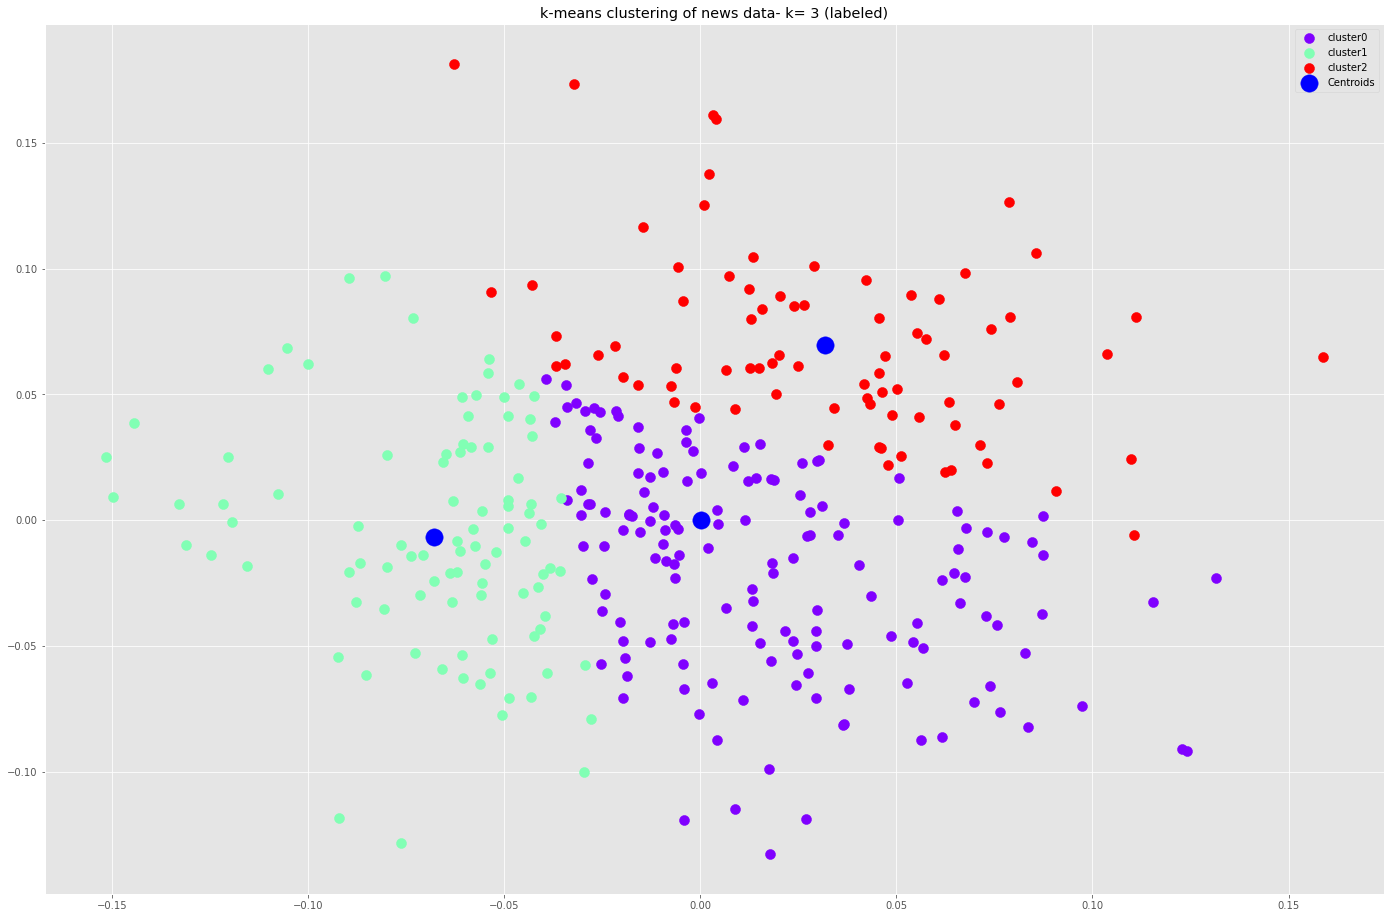

In [33]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 3 (labeled)").show()

In [ ]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=100, n_gram=(2, 4), analyzer="char")

In [ ]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 3 (labeled)").show()

In [47]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 6,  labels,  n_components=2, max_features=100, n_gram=(1, 2), analyzer="word")

   Completeness  Homogeneity  silhouette_score 
0      0.063139     0.000534           0.998491


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

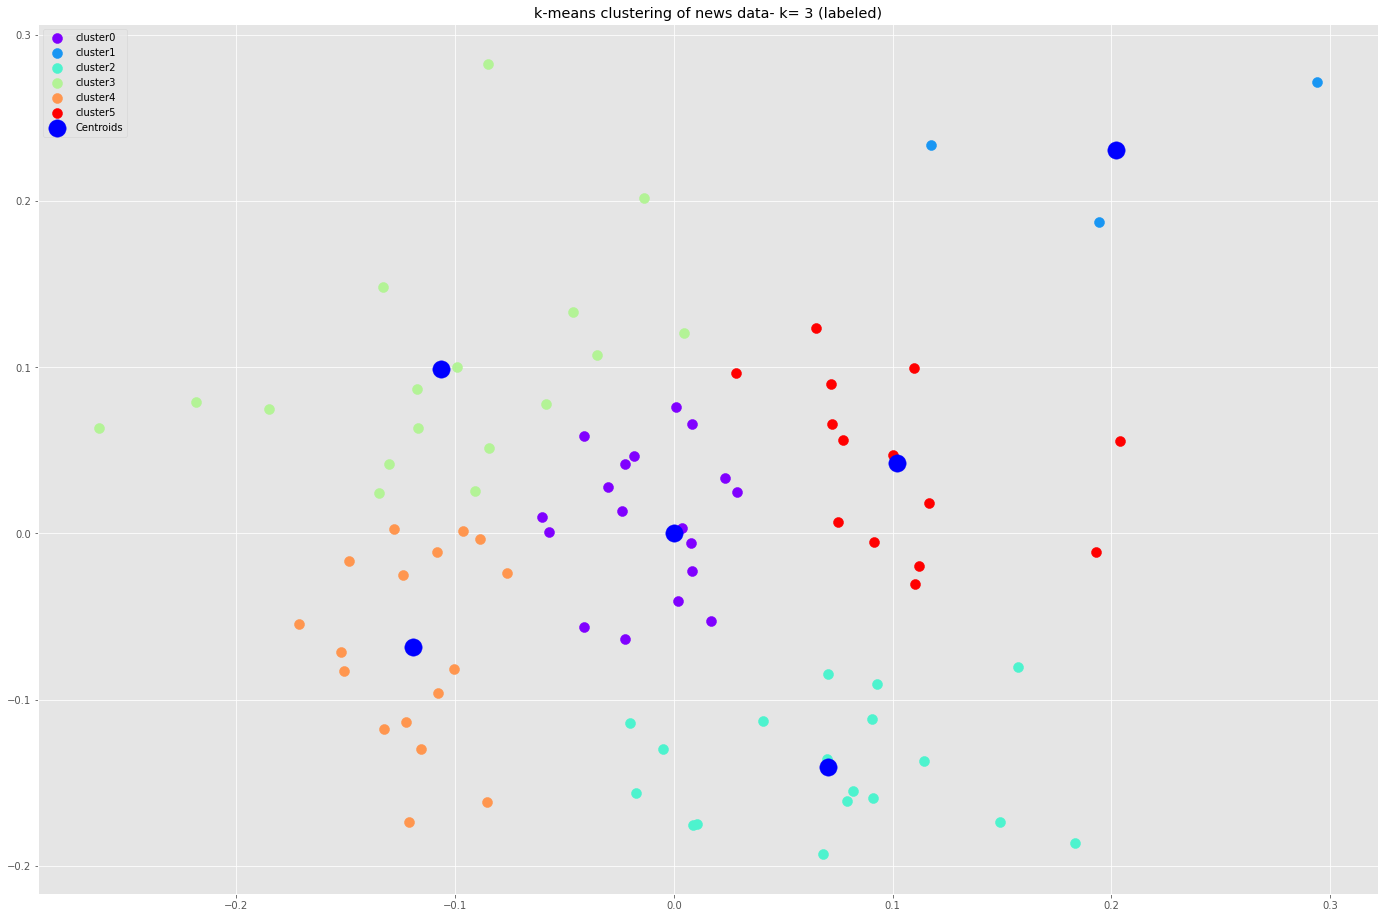

In [48]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 3 (labeled)").show()

In [26]:
# data info after preprocess
df_label_counts = df["category"].value_counts()
df_label_counts

business     6739
wire         6739
radio        6739
general      6739
broadcast    6739
newspaper    6739
Name: category, dtype: int64

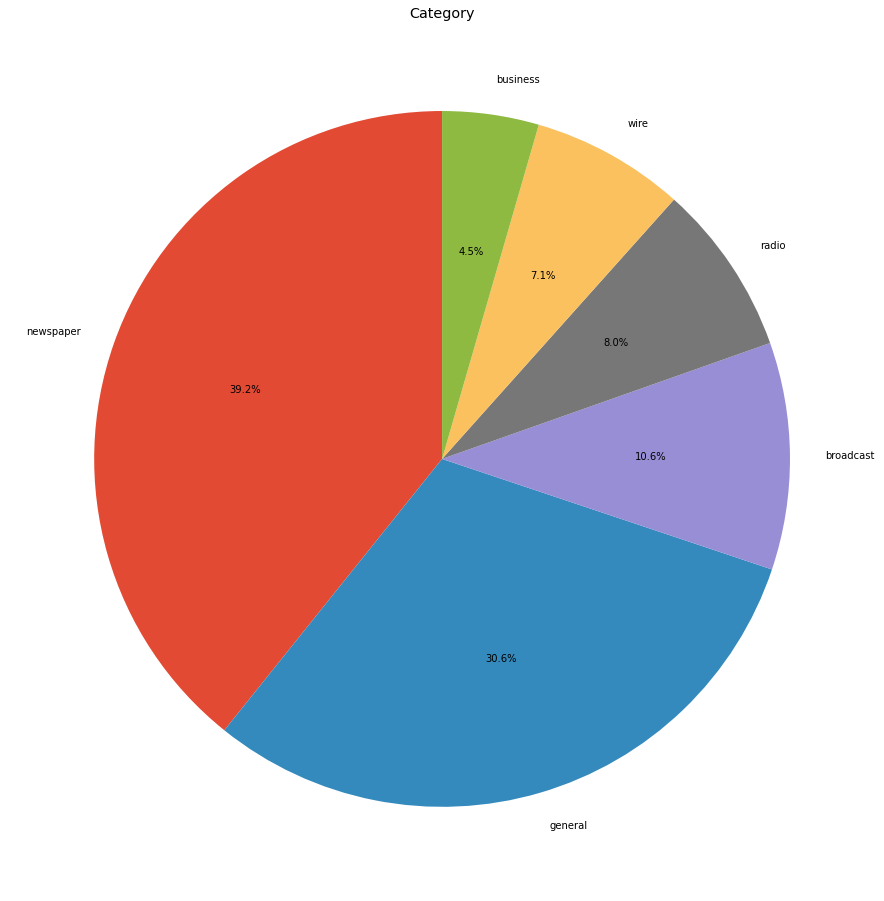

In [5]:
# visualize the sample counts of each label
labels = list(df_label_counts.to_frame().index)
counts = df_label_counts.values
plot_pie_chart(labels, counts, "Category").show()

In [21]:
# map categoric lables to numeric
df["label"] = df["category"].map({'broadcast': 0, 'radio': 1, 'wire': 2, 'business':3, 'general': 4, 'newspaper': 5})
df.head()

,content,category,label
0,winter sitout period end monday transfer stude...,newspaper,5
1,peopl kill miss ferri caught sunday coast indo...,newspaper,5
2,hello mark olsen welcom weekli field guid worl...,newspaper,5
3,carri fisher best known princess leia star war...,newspaper,5
4,place like home jeff carter king roam free ret...,newspaper,5


In [22]:
df.head()

,content,category,label
0,winter sitout period end monday transfer stude...,newspaper,5
1,peopl kill miss ferri caught sunday coast indo...,newspaper,5
2,hello mark olsen welcom weekli field guid worl...,newspaper,5
3,carri fisher best known princess leia star war...,newspaper,5
4,place like home jeff carter king roam free ret...,newspaper,5


# Select Number of Clusters

In [8]:
transformed = apply_tf_idf(df['content'], max_features=100)
df_svd = apply_svd(transformed, 2)
df_svd.shape

(150306, 2)

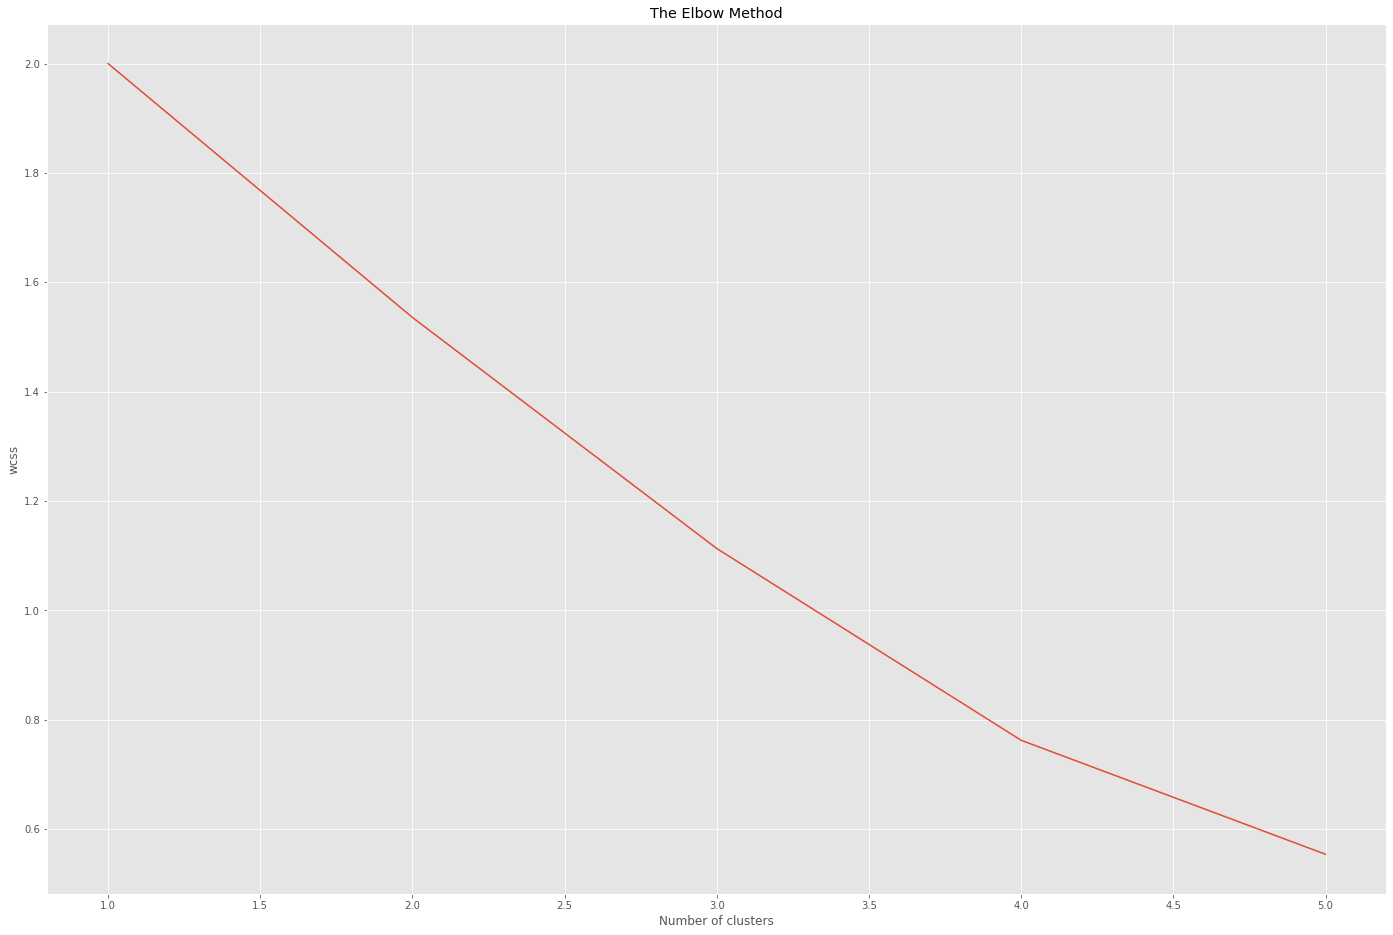

In [9]:
# use elbow method to define number of cluster
plot_elbow(df_svd, (1, 6)).show()

# Clustering Results

In [10]:
# apply pipeline with default parameters 
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 2, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(150306, 2)
   silhouette_score 
0           0.999276
Number of samples in each cluster:Counter({0: 150277, 1: 29})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


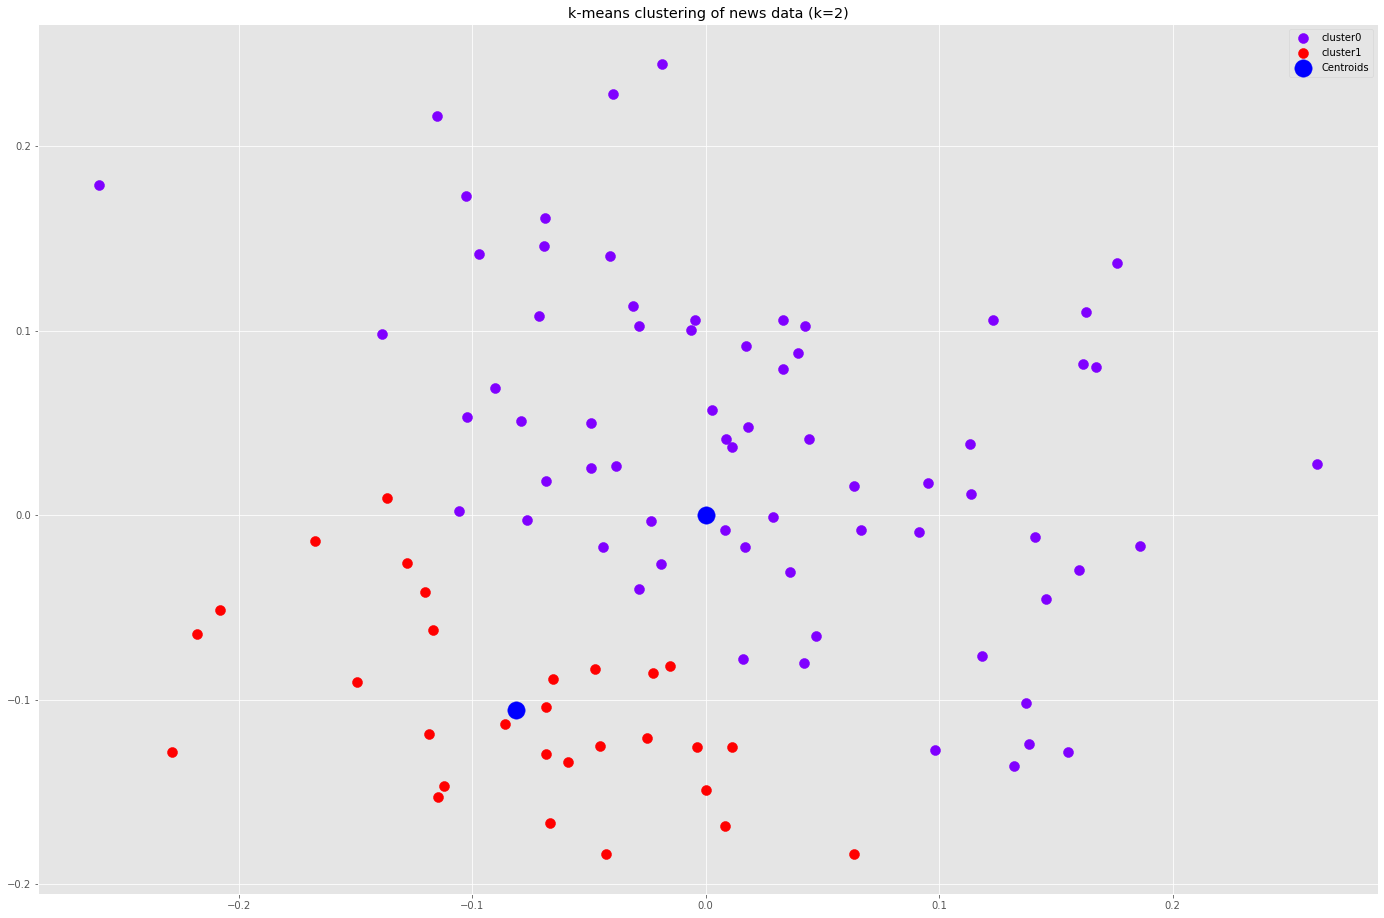

In [11]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data (k=2)").show()

In [12]:
# apply k-means clustering fot number of cluter 4
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 4, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(150306, 2)
   silhouette_score 
0           0.999477
Number of samples in each cluster:Counter({0: 150240, 3: 27, 1: 21, 2: 18})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

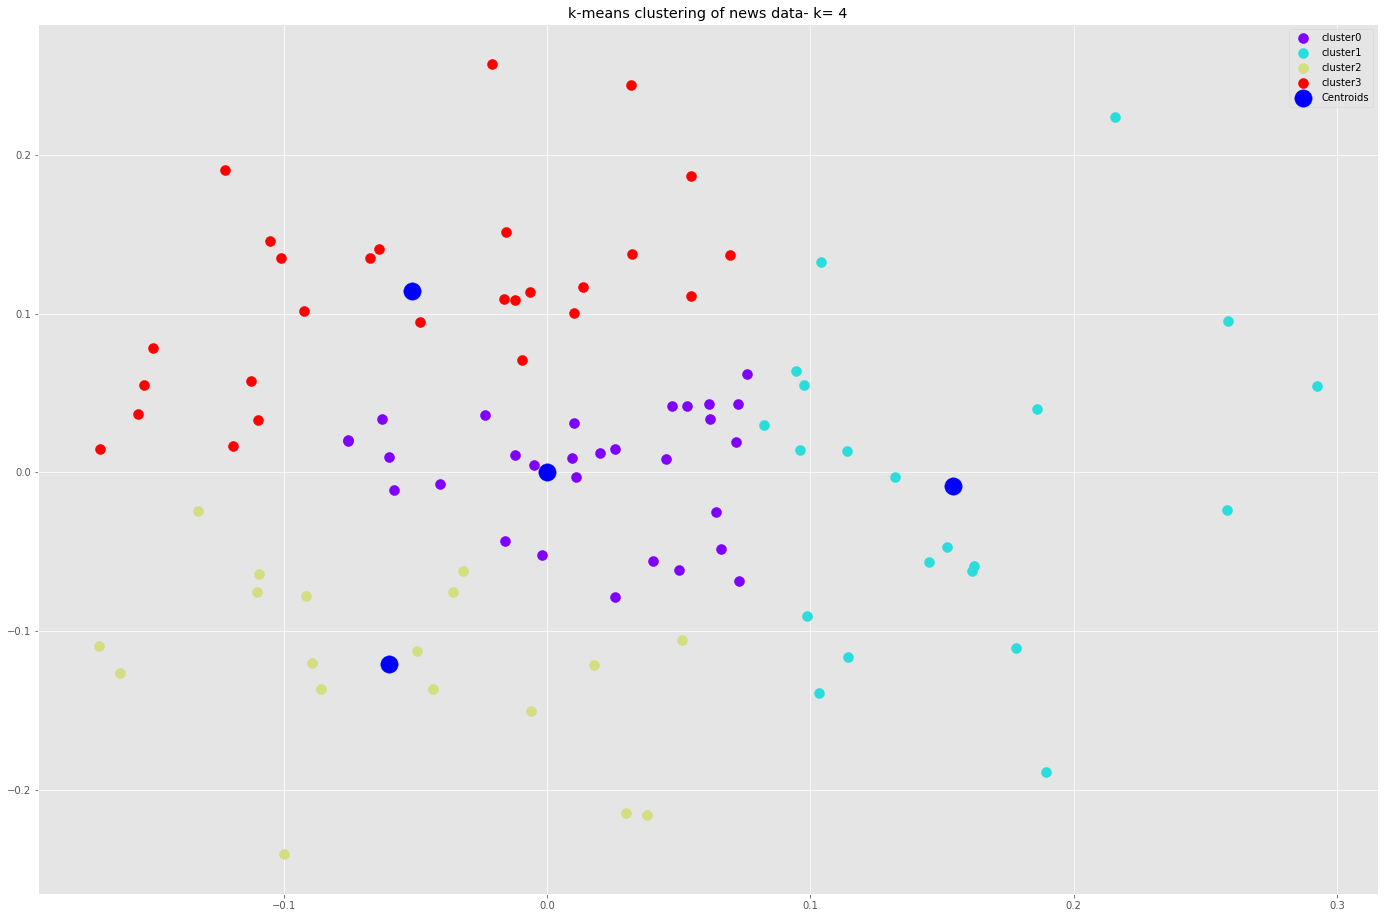

In [13]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4").show()

In [14]:
# apply k-means clustering fot number of cluter 4
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 3, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(150306, 2)
   silhouette_score 
0           0.999412
Number of samples in each cluster:Counter({0: 150256, 2: 25, 1: 25})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


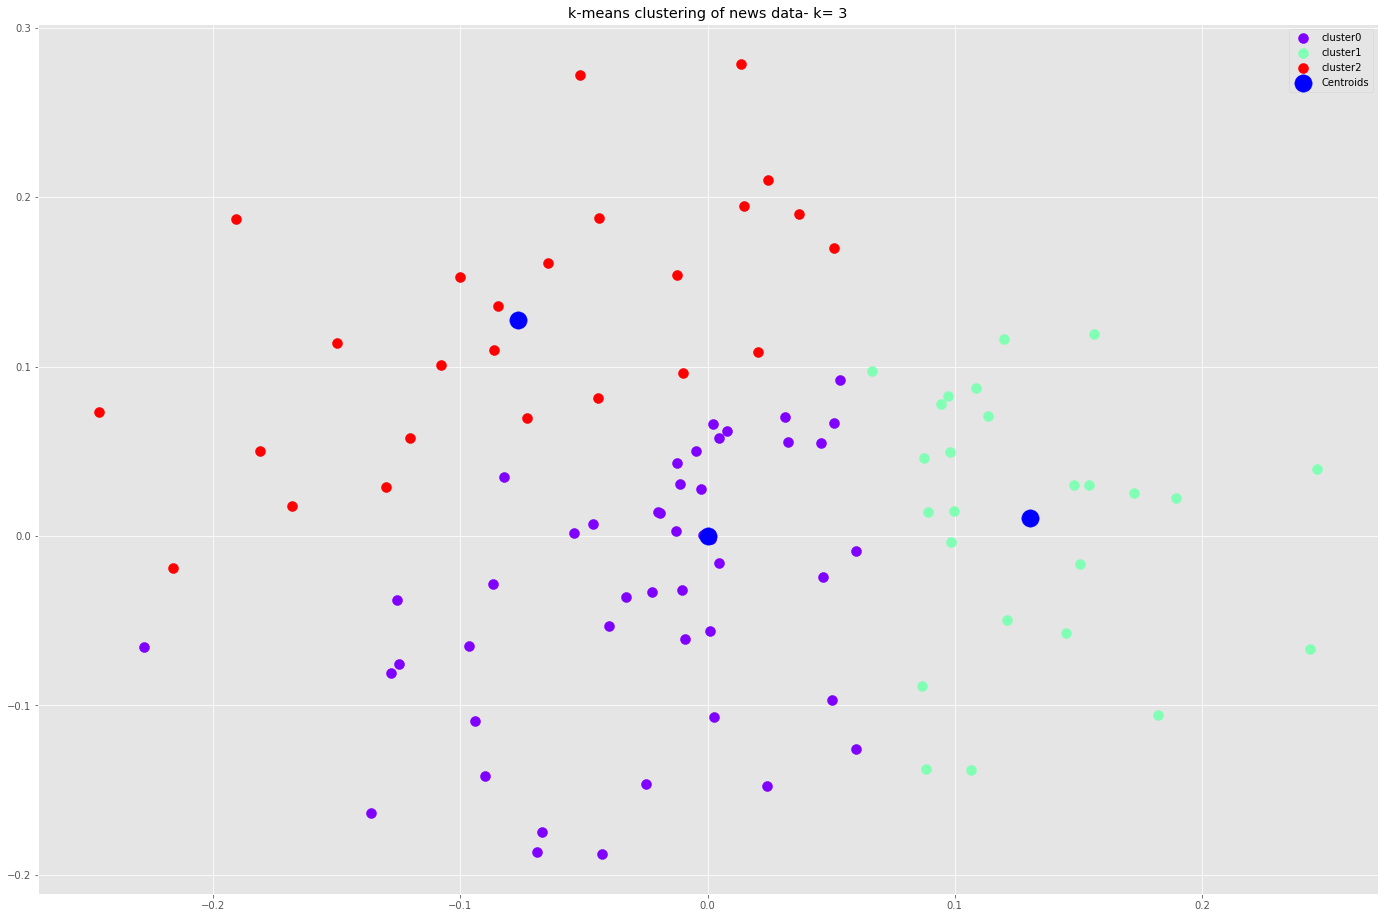

In [15]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 3").show()

In [16]:
# apply k-means clustering fot number of cluter 6
kmeans, y_kmeans, data_svd = apply_svd_pipeline(data=df['content'], n_components=2,  init = 'k-means++', n_clusters = 6, model = 'k-means', max_features=100, analyzer='word')

Shape of the data:(150306, 2)
   silhouette_score 
0           0.999548
Number of samples in each cluster:Counter({0: 150230, 5: 18, 3: 18, 1: 17, 4: 14, 2: 9})


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

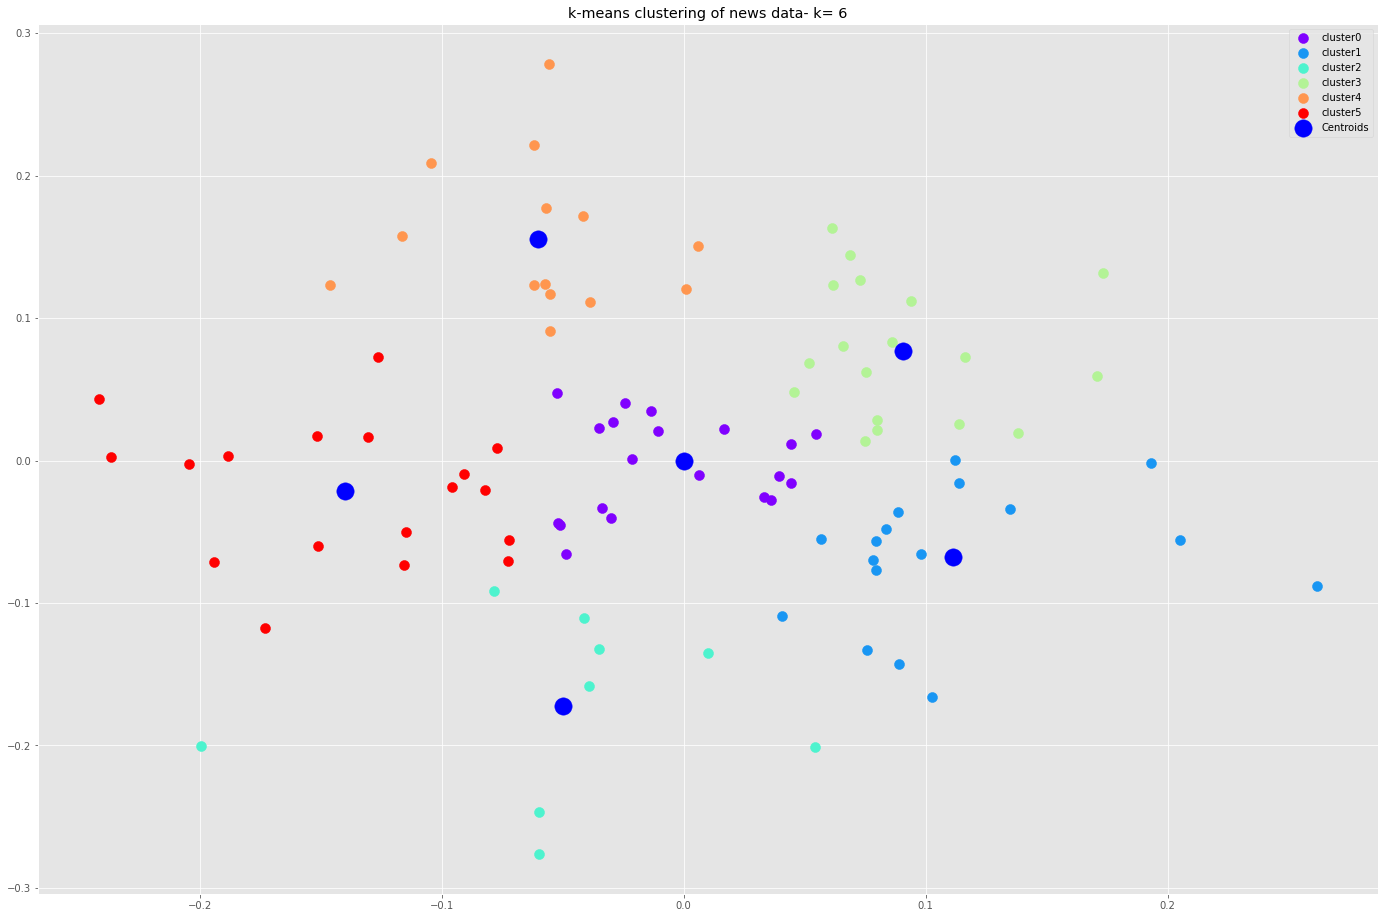

In [17]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 6").show()

In [23]:
corpus = df['content'].values
labels = df['label'].values
kmeans, y_kmeans, data_svd = pipeline(corpus, 2,  labels, n_components=10, max_features=10000)

   Completeness  Homogeneity  silhouette_score 
0      0.014728     0.000783           0.919836


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


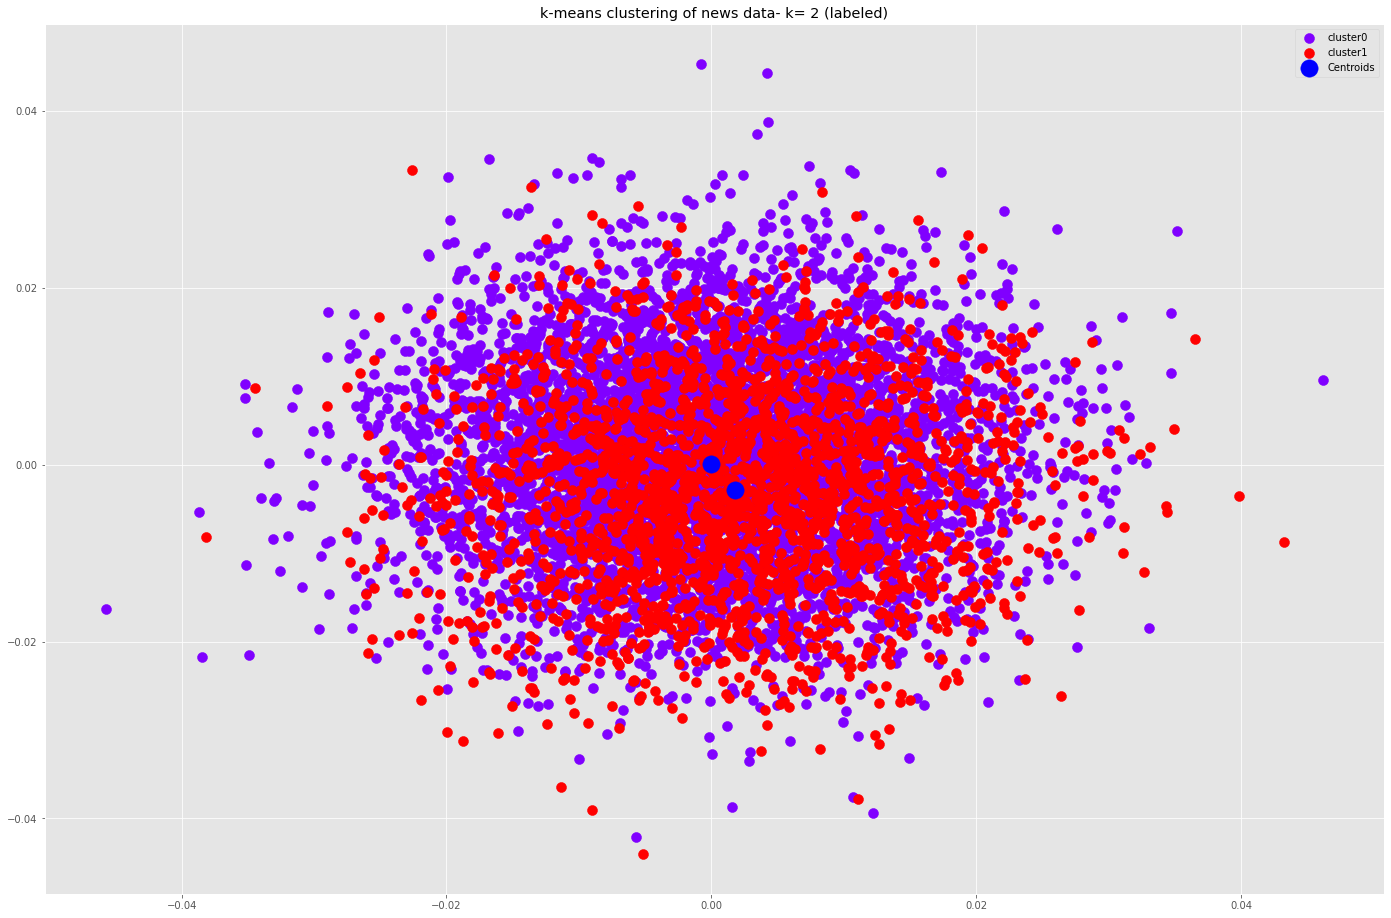

In [24]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 2 (labeled)").show()

In [25]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 2,  labels, n_components=2, max_features=1000)

   Completeness  Homogeneity  silhouette_score 
0      0.022663     0.000202           0.992786


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


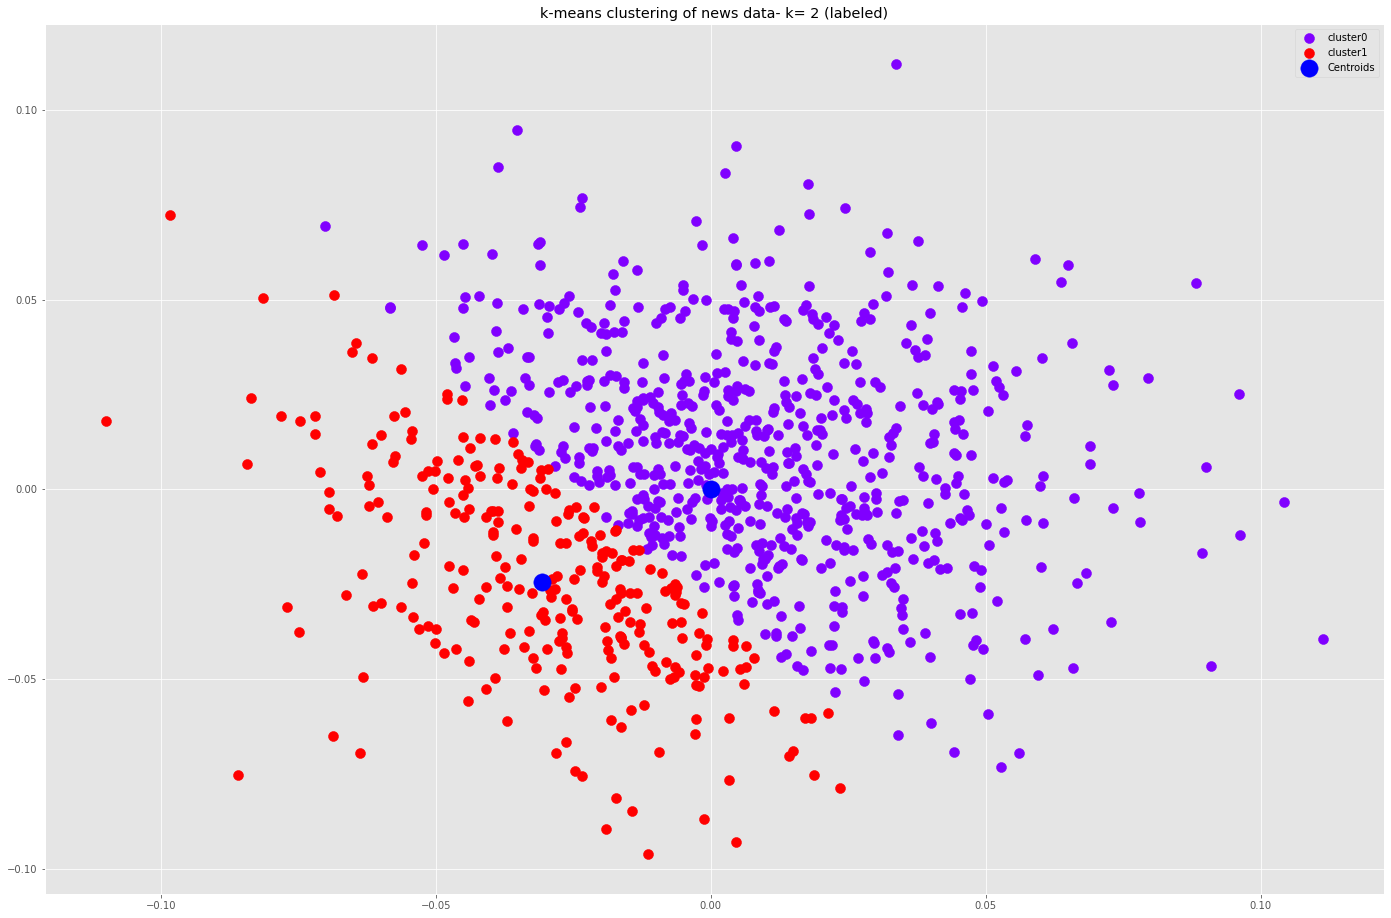

In [26]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 2 (labeled)").show()

In [27]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 6,  labels, n_components=2, max_features=1000)

   Completeness  Homogeneity  silhouette_score 
0      0.022898     0.000562           0.995295


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

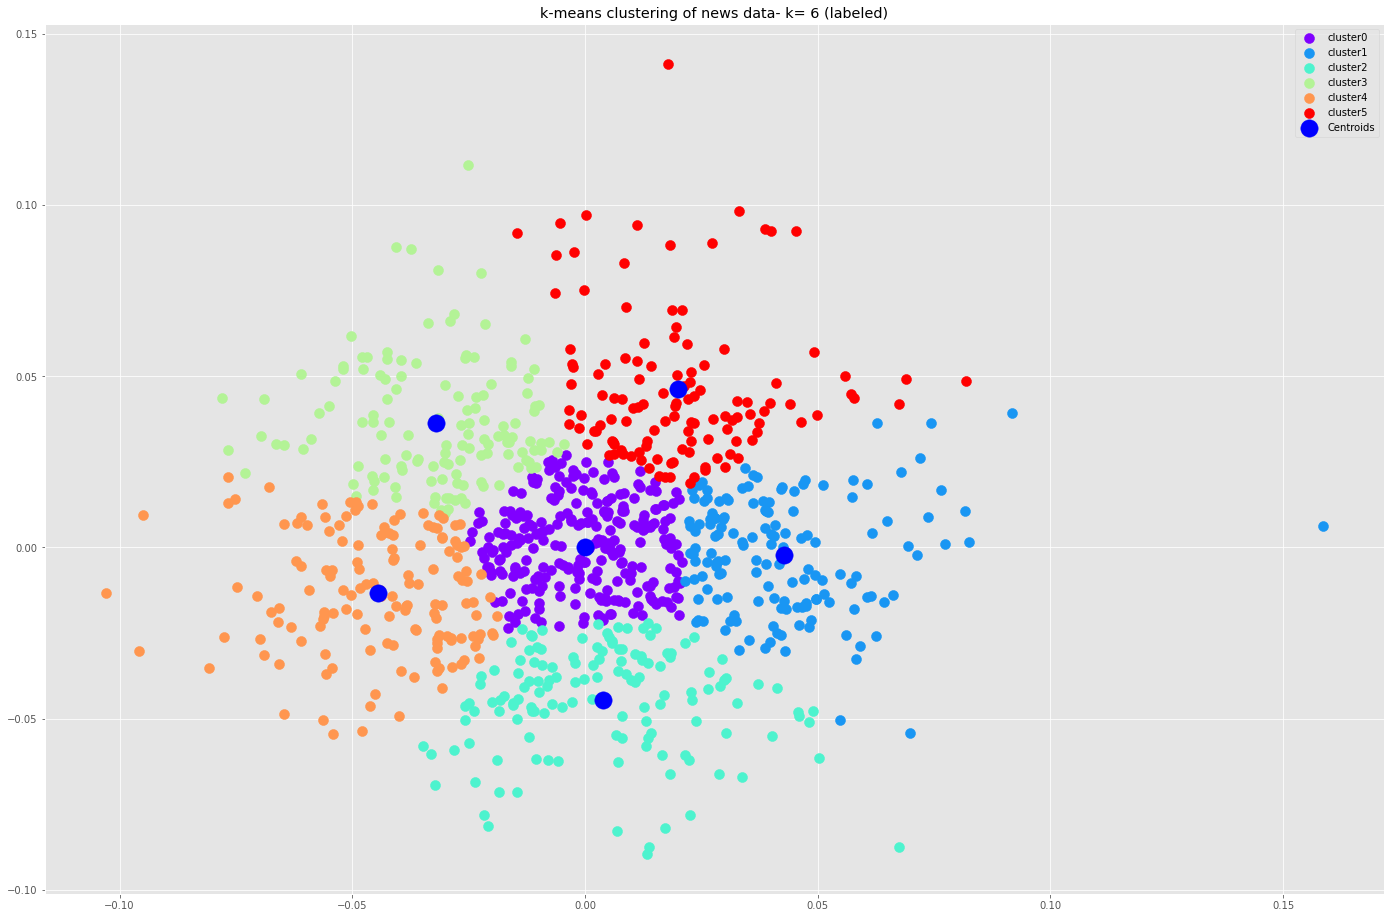

In [28]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 6 (labeled)").show()

In [29]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 6,  labels, n_components=2, max_features=1000, n_gram=(1, 2), analyzer="char")

   Completeness  Homogeneity  silhouette_score 
0      0.033279     0.000324           0.998265


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

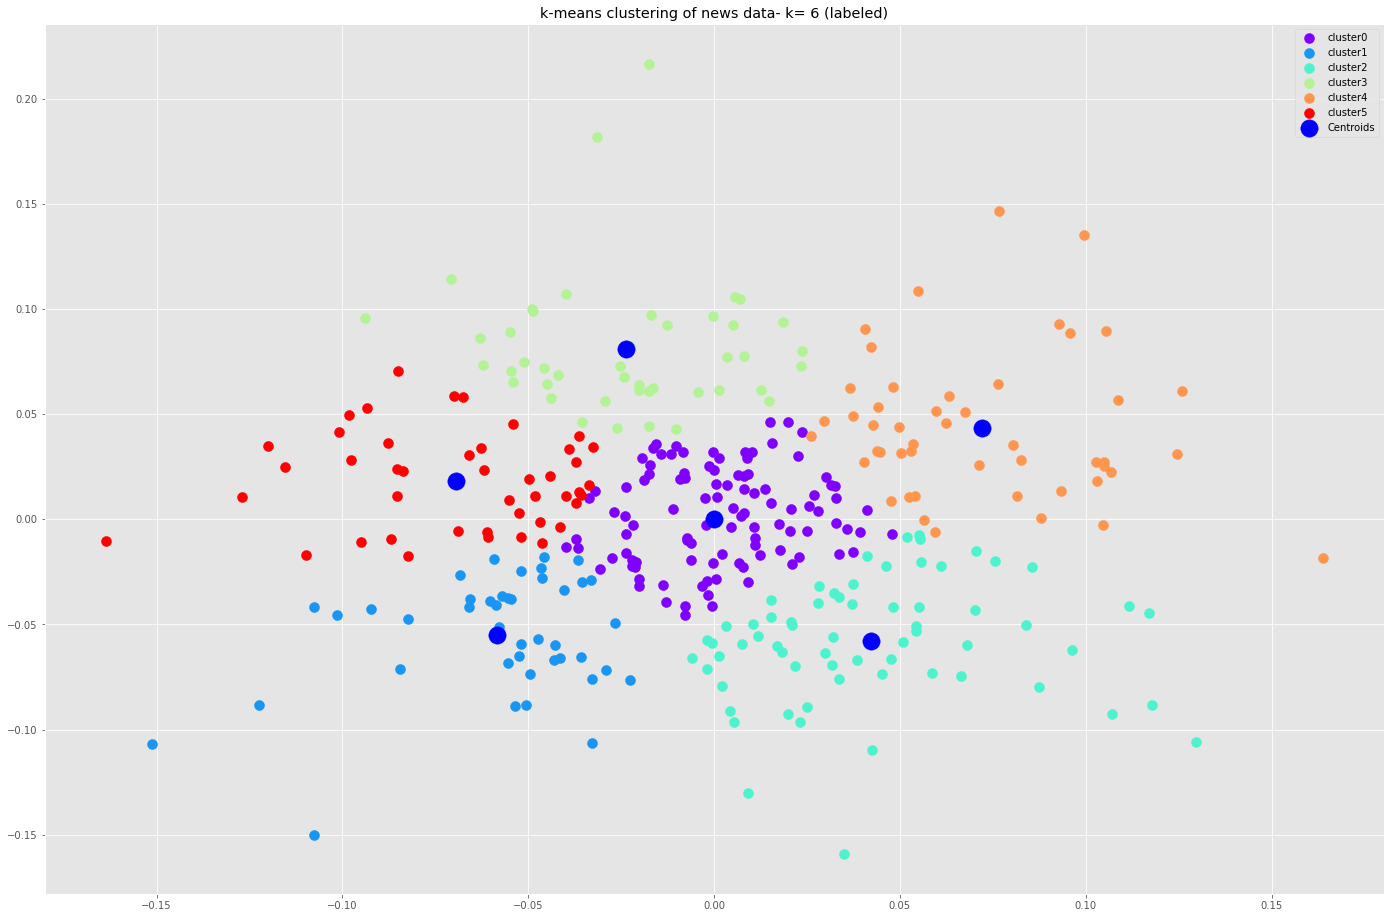

In [30]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 6 (labeled)").show()

In [31]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 6,  labels, n_components=2, max_features=1000, n_gram=(1, 2), analyzer="word")

   Completeness  Homogeneity  silhouette_score 
0      0.023235     0.000542            0.99578


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

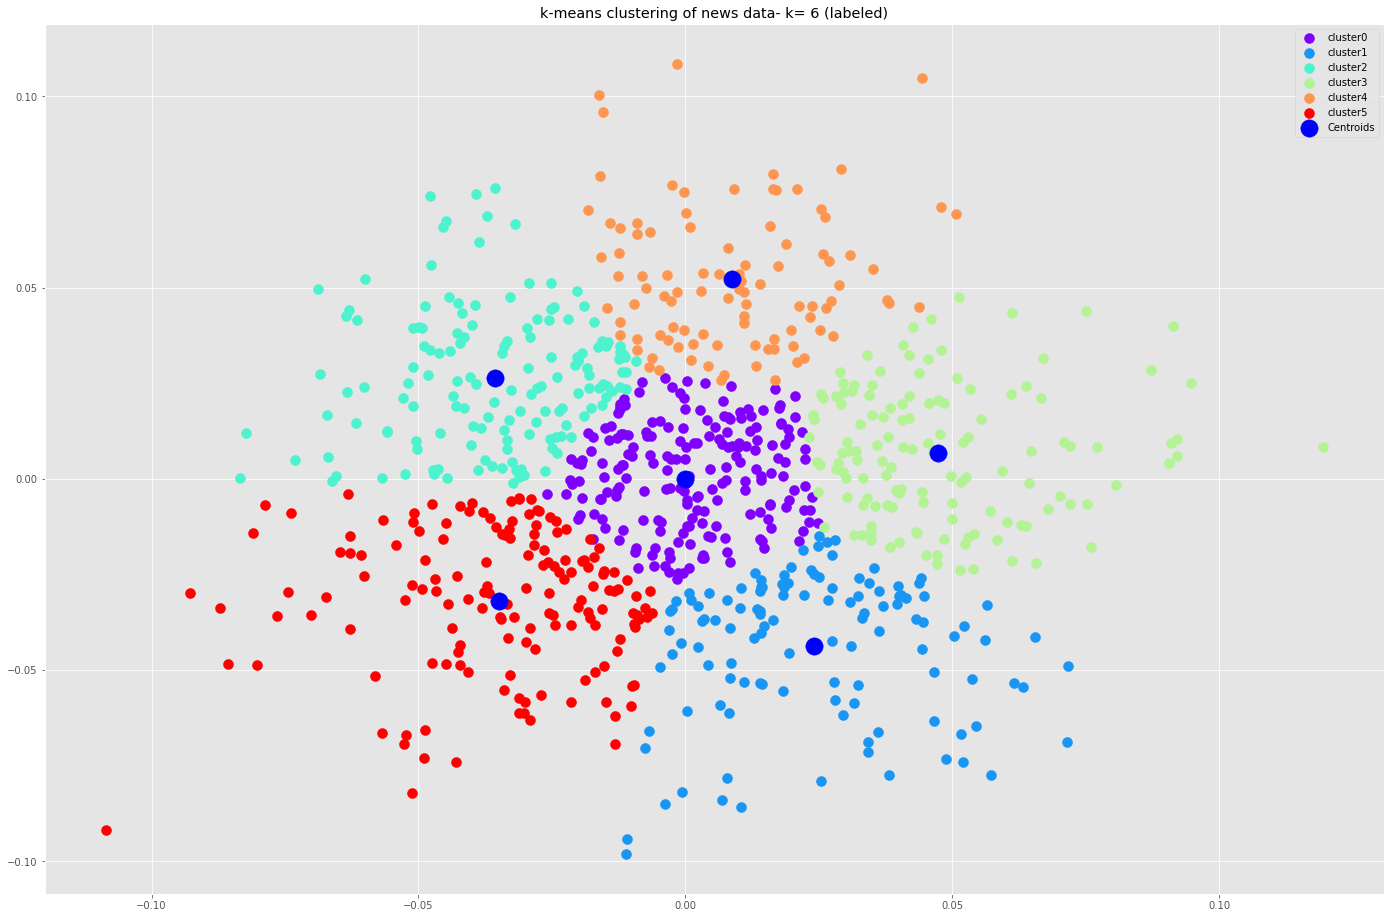

In [32]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 6 (labeled)").show()

In [33]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 6,  labels, n_components=2, max_features=1000, n_gram=(2, 4), analyzer="char")

   Completeness  Homogeneity  silhouette_score 
0      0.010669     0.000177           0.997112


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

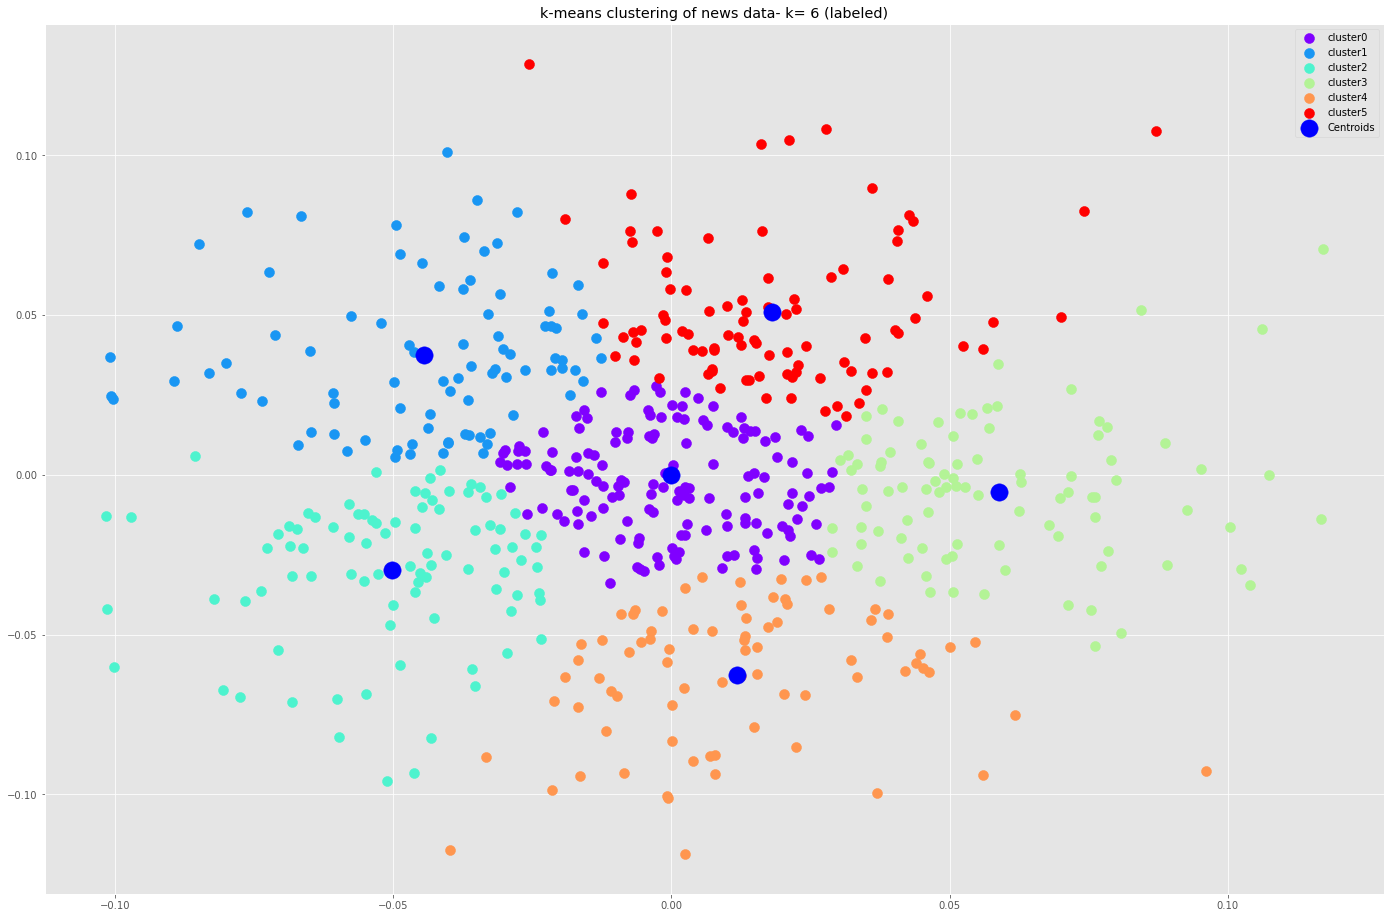

In [34]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 6 (labeled)").show()

In [35]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=2, max_features=1000, n_gram=(2, 4), analyzer="char")

   Completeness  Homogeneity  silhouette_score 
0      0.006806     0.000101           0.996801


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

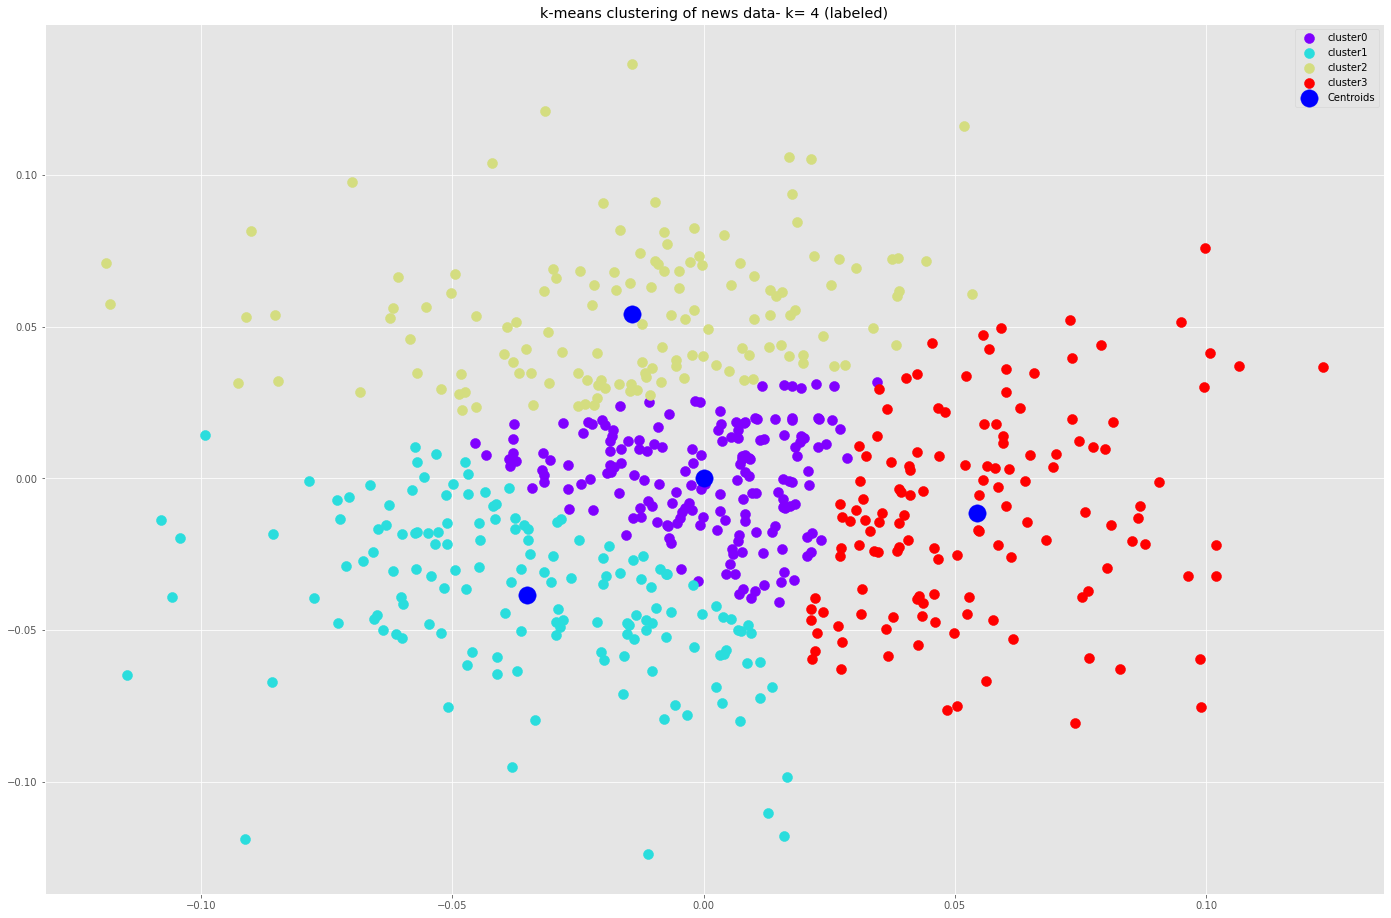

In [36]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()

In [37]:
kmeans, y_kmeans, data_svd = pipeline(corpus, 4,  labels, n_components=100, n_gram=(2, 4), analyzer="char")

   Completeness  Homogeneity  silhouette_score 
0      0.078809     0.000014           0.751046


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

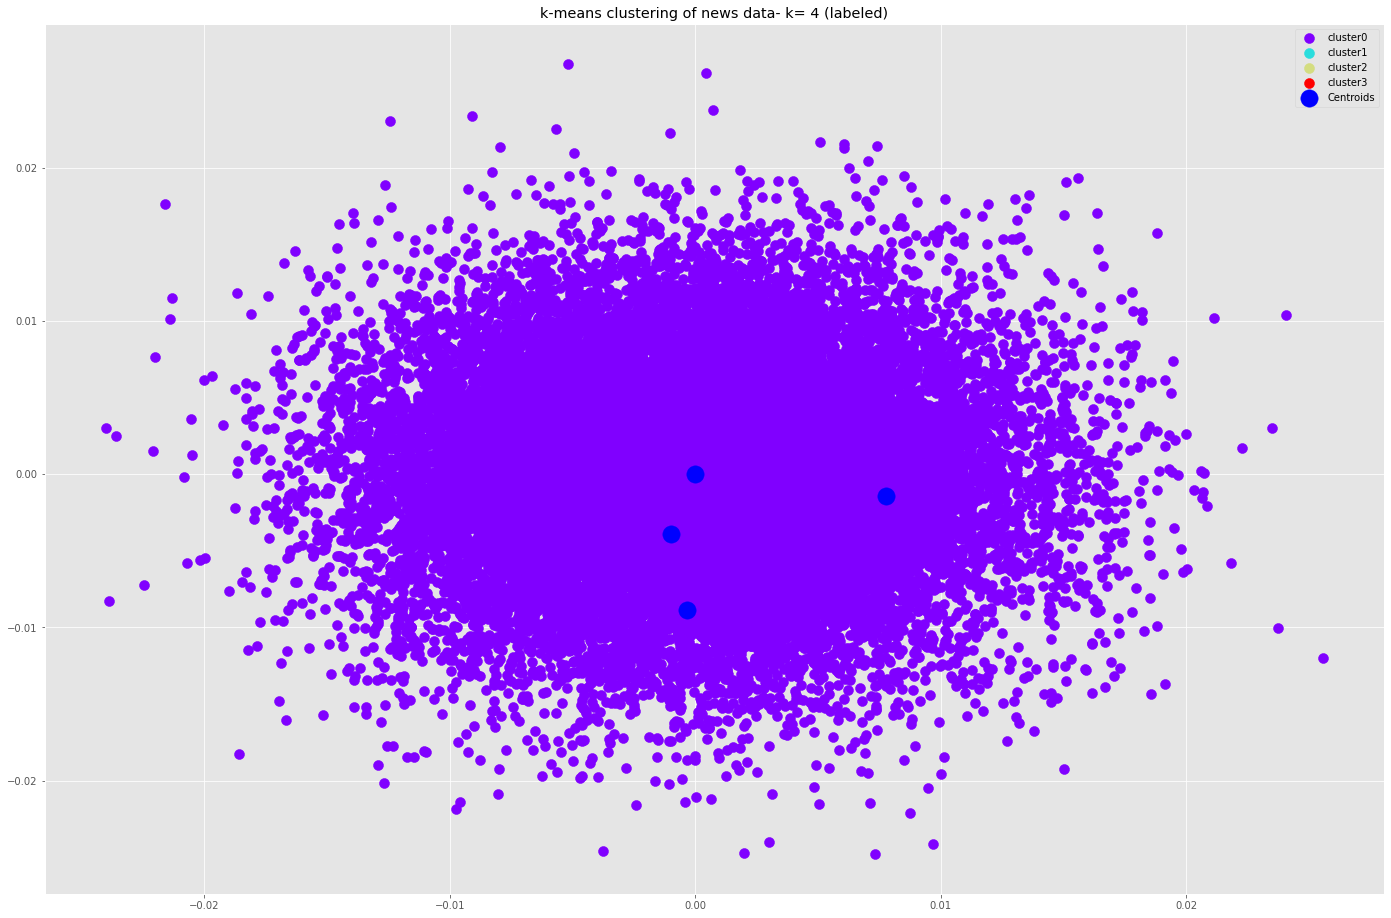

In [38]:
plot_cluster_result(data_svd, y_kmeans, kmeans, "k-means clustering of news data- k= 4 (labeled)").show()